<a href="https://colab.research.google.com/github/yajima-yasutoshi/DataScience2025/blob/main/20251219/%E5%88%86%E6%9E%90%E8%AA%B2%E9%A1%8C1%E3%81%AE%E8%A7%A3%E7%AD%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#分析課題第一回（20251219）

C-Learning から共有された解答フォームに従い分析行い解答せよ。

今回の課題で用いるデータは以下の2種類である。


*   Books データベース
*   Wine データ

それぞれのデータの読み込み方法は以下に説明がある。


# 準備

In [ ]:
# インストール
!pip install japanize-matplotlib

# 必要なライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import scipy.stats as st

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=7d8f88a913579bc75351166a4dd2e02ec8e9a11d240d50f3abc23f579f2a8abd
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize-matplotlib


# Booksデータベース

Booksデータベースには、世界各国で出版された本のデータが格納されている。
以下のセルを実行することで、CSVファイルがデータフレームに格納される。

## データの読み込み
* データをダウンロード

    以下のアドレスより、book.csv をPCにダウンロードする。

    https://github.com/yajima-yasutoshi/DataScience2025/tree/main/20251219
    

* データ（ books.csv ）を Google Drive の適当なフォルダーにアップロード

* Google Drive のマウントの確認

一部に読み込めないレコードがあるので、以下の例のように
```
on_bad_lines='skip'
```
を指定する必要がある。また、以下の部分は各自の環境に合わせて変更する
```
file_name = '/content/drive/MyDrive/データ/books.csv'
```

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# データフレームへの読み込み
file_name = '/content/drive/MyDrive/データ/books.csv'
# 一部に読み込めないレコードがあるので、on_bad_lines='skip'を指定している
df = pd.read_csv(file_name, on_bad_lines='skip')
df.rename(columns={'  num_pages': 'num_pages'}, inplace=True)

## 項目の説明

No. | 項目                  | 説明
 --   | --                      | --
 1 | bookID             |  本のID番号
 2 | title              |  本のタイトル
 3 | authors            |  本の著者
 4 | average_rating     |  平均評価
 5 | isbn               |  ISBN番号
 6 | isbn13             |  ISBN番号
 7 | language_code      |  言語
 8 | num_pages          |  ページ数
 9 | ratings_count      |  評価の数
 10 |text_reviews_count |  レビュー文章が記載された数
 11 | publication_date   |  出版日  
 12 | publisher          |  出版社

読み込みが完了したら、booksデータベースに関する課題に取り組め。

## データの確認

データの先頭を表示して、データの中身を確認する。

In [ ]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


レコードの数と列の個数を調べる。

In [ ]:
df.shape

(11123, 12)

列の型と欠損値の有無を確認する



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7   num_pages           11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


上の結果から、それぞれの項目変数の型、また欠損値が無いことが分かる。

### 型の見分け方

Dtype を見ることで変数の型が分かる。

型 | Dtype
-- | --
数値型 | int??, float??,
カテゴリ型 | object


## 各項目の調査



*   数値型：最大、最小、平均、中央値など
*   カテゴリ型：カテゴリ数、最頻値など



データに登録されている本の平均評価（average_rating）の中央値は何点か。

データに登録されている本のページ数（num_pages）の平均値は何ページか。


###記述統計量

In [ ]:
#数値型の確認
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [ ]:
q1 = df['num_pages'].quantile(0.25)
q3 = df['num_pages'].quantile(0.75)
print( q3 - q1 )

224.0


In [ ]:
#カテゴリ型の確認
df.describe(include='object')

,title,authors,isbn,language_code,publication_date,publisher
count,11123,11123,11123,11123,11123,11123
unique,10348,6639,11123,27,3679,2290
top,The Brothers Karamazov,Stephen King,8497646983,eng,10/1/2005,Vintage
freq,9,40,1,8908,56,318


In [ ]:
df['language_code'].value_counts()

,count
language_code,
eng,8908
en-US,1408
spa,218
en-GB,214
fre,144
ger,99
jpn,46
mul,19
zho,14


## データの理解

最も多く本が登録されている著者は誰か

In [ ]:
df['authors'].mode()

,authors
0,P.G. Wodehouse
1,Stephen King


In [ ]:
df['authors'].value_counts().sort_values(ascending=False).head(4)

,count
authors,
Stephen King,40
P.G. Wodehouse,40
Rumiko Takahashi,39
Orson Scott Card,35


### 最もページ数（num_pages）の多い本は何か。

In [ ]:
df.sort_values(by = 'num_pages', ascending=False).head(3)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
6497,24520,The Complete Aubrey/Maturin Novels (5 Volumes),Patrick O'Brian,4.70,039306011X,9780393060119,eng,6576,1338,81,10/17/2004,W. W. Norton Company
6802,25587,The Second World War,Winston S. Churchill/John Keegan,4.45,039541685X,9780395416853,eng,4736,1493,99,5/9/1986,Mariner Books
10906,44613,Remembrance of Things Past (Boxed Set),Marcel Proust/C.K. Scott Moncrieff/Frederick A...,4.34,0701125594,9780701125592,eng,3400,6,1,3/5/1981,Chatto & Windus


## num_pages(ページ数)の分布

<Axes: xlabel='num_pages', ylabel='Count'>

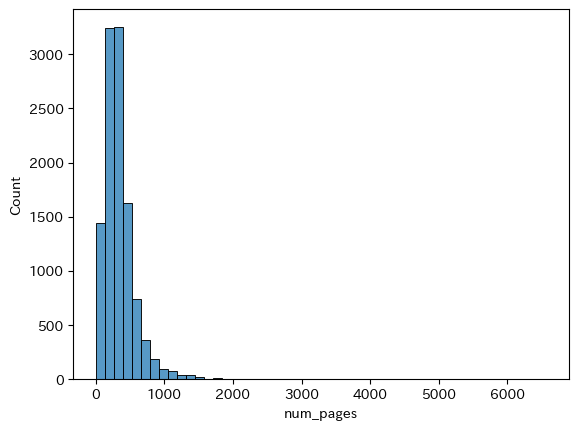

In [ ]:
sns.histplot(df['num_pages'], bins=50)

<Axes: ylabel='num_pages'>

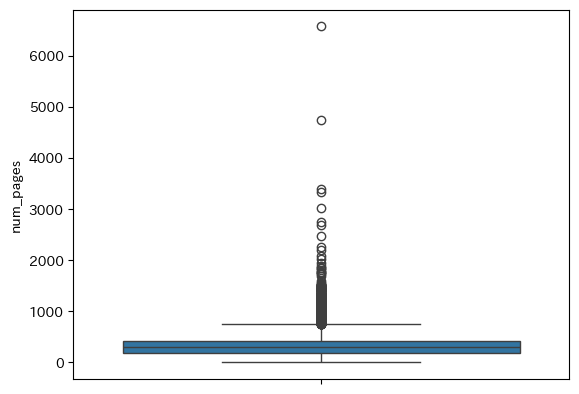

In [ ]:
sns.boxplot(df['num_pages'])

## average_ratings の分布


<Axes: xlabel='average_rating', ylabel='Count'>

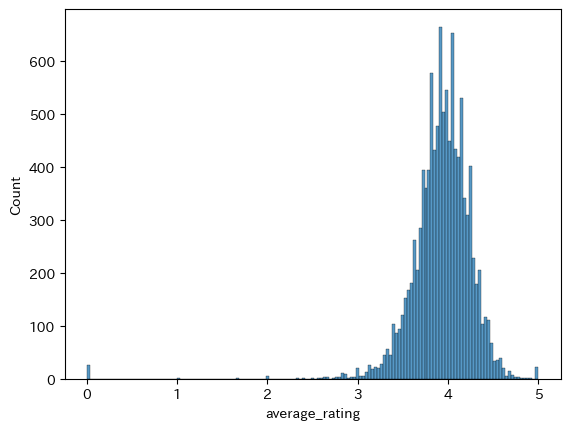

In [ ]:
sns.histplot(df['average_rating']) #, binwidth=0.1)

<Axes: ylabel='ratings_count'>

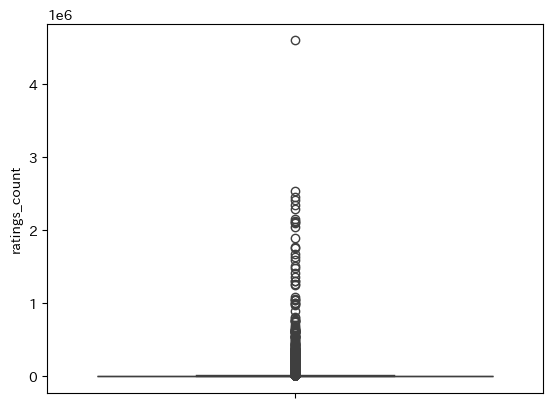

In [ ]:
sns.boxplot(df['ratings_count']) #, binwidth=0.1)

著者の中で、ページ数（num_pages）の平均が最も多い著者は誰か？

In [ ]:
df.groupby('authors')['num_pages'].mean().sort_values(ascending=False)

,num_pages
authors,
Winston S. Churchill/John Keegan,4736.0
Marcel Proust/C.K. Scott Moncrieff/Frederick A. Blossom/Joseph Wood Crutch,3400.0
Dennis L. Kasper/Dan L. Longo/Stephen L. Hauser/Anthony S. Fauci/Eugene Braunwald,2751.0
Anonymous,2198.0
Laurence L. Brunton/John S. Lazo/Keith L. Parker,2021.0
...,...
Stephen Hunter/Will Patten,0.0
Haruki Murakami/Ellen Archer/Patrick Lawlor,0.0
Frank Graham,0.0


## booksデータベースで、language_code が spa の本は何冊あるか。

In [ ]:
df[ df['language_code'] == 'spa' ].shape

(218, 12)

## 出版社 （publisher）の中で、ページ数の平均が最も多い出版社はどれか。

In [ ]:
df.groupby('publisher')['num_pages'].mean().sort_values(ascending=False)
# Group the data by publisher and compute the average number of pages for each publisher
# average_pages_per_publisher = df.groupby('publisher')['num_pages'].mean().reset_index()
# average_pages_per_publisher

,num_pages
publisher,
McGraw-Hill Medical Publishing,2751.0
Zondervan Publishing House,2198.0
Starfire,2088.0
Bollingen/Princeton University Press (NJ),1757.0
Collins Modern Classics,1600.0
...,...
Your Coach Digital,0.0
Audio Renaissance,0.0
Warner Adult,0.0


出版社（publisher） 毎に ratings_count の合計を計算する。このとき、合計が最も多い publisher はどれか。

In [ ]:
df.groupby('publisher')['ratings_count'].sum().sort_values(ascending=False)

,ratings_count
publisher,
Penguin Books,10967448
Scholastic Inc.,6617877
Little Brown and Company,5493803
Penguin Classics,5281321
Vintage,5001557
...,...
Random House Puzzles & Games,0
Raintree,0
Puzzle-Roca,0


ratings_count の合計の多い出版社 Top5を可視化してみる。

In [ ]:
ratings_count_per_publisher_top5 = df.groupby('publisher')['ratings_count'].sum().sort_values(ascending=False).head(5).reset_index()

In [ ]:
ratings_count_per_publisher_top5

,publisher,ratings_count
0,Penguin Books,10967448
1,Scholastic Inc.,6617877
2,Little Brown and Company,5493803
3,Penguin Classics,5281321
4,Vintage,5001557


Text(0, 0.5, '出版社')

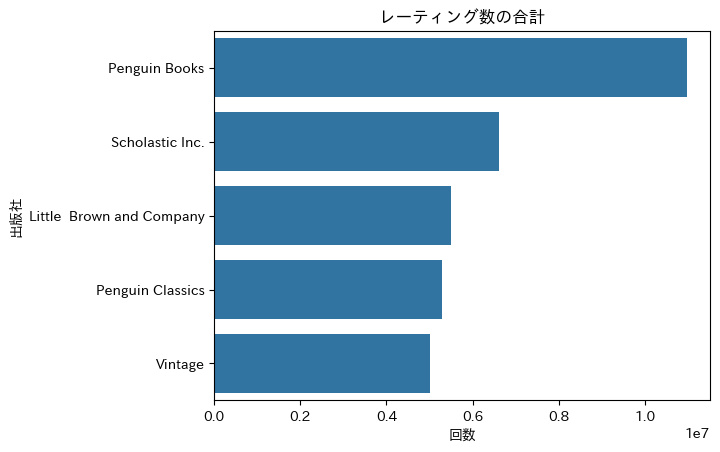

In [ ]:
sns.barplot(x='ratings_count', y='publisher', data=ratings_count_per_publisher_top5)
plt.title('レーティング数の合計')
plt.xlabel('回数')
plt.ylabel('出版社')

language_code が jpn の本に限定した場合、
num_pages が最も多い本の出版社（publisher）はどれか。

In [ ]:
# language_code が jpn の本に限定
df_jpn = df[df['language_code'] == 'jpn']

# avarage_ratingが最も多い本を抽出
df_jpn.sort_values(by='num_pages', ascending=False).head(5)


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
3775,13593,ヒカルの碁 18、番外編,Yumi Hotta/Yumi Hotta,4.11,4088732898,9784088732893,jpn,211,275,7,8/2/2002,集英社
3778,13596,ヒカルの碁 15、さよなら,Yumi Hotta/Yumi Hotta,4.25,4088732154,9784088732152,jpn,211,289,8,12/24/2001,集英社
3782,13603,ヒカルの碁 6、院生試験,Yumi Hotta/Takeshi Obata,4.22,4088728491,9784088728490,jpn,211,8,2,4/9/2000,集英社
3777,13595,ヒカルの碁 7、若獅子戦,Yumi Hotta/Yumi Hotta,4.26,4088728734,9784088728735,jpn,208,9,2,6/7/2000,集英社
3783,13608,ヒカルの碁 9、本戦開始,Yumi Hotta/Yumi Hotta,4.27,4088730224,9784088730226,jpn,207,9,2,10/9/2000,集英社


language_code が jpn の本に限定した場合、ページ数の平均が最も多い出版社（publisher）はどれか。

In [ ]:
df[ df['language_code'] == 'jpn' ].groupby('publisher')['num_pages'].mean().sort_values(ascending=False)
#df[ df['language_code'] == 'jpn' ].groupby('publisher')['num_pages'].agg(['count', 'mean'])

,num_pages
publisher,
集英社,199.500000
Shueisha,195.666667
小学館,191.533333
講談社,186.833333
ガンガンコミックス,185.200000
ビブロス,182.000000
Hakusen Sha,178.000000
小学館 [Shōgakukan],176.000000
角川書店 (Kadokawa Shoten),171.500000


language_code が ger のデータのページ数平均の 95% 信頼区間を求める。

In [ ]:
import numpy as np
import scipy.stats as st

# 信頼区間を求めたいデータを変数「_data」にセットする。
_data = df[ (df['language_code'] == 'ger') ]['num_pages']

# 信頼水準を設定
confidence = 0.95

# 標本平均と標準誤差を計算
mean = _data.mean()
sem = st.sem(_data)

# 信頼区間の導出
# scipy.stats.t.interval 関数を使用して、信頼区間を求める。
lower_bound, upper_bound = st.t.interval(confidence, df=_data.shape[0] - 1, loc=mean, scale=sem)

# 信頼区間を表示
print(f"信頼区間: ({lower_bound:.2f}, {upper_bound:.2f})")


信頼区間: (343.10, 440.86)


In [ ]:
print( upper_bound - lower_bound )

97.7549395183446


language_code が ger と fre に限定したデータフレームを作成する。
変数名は data とする。

<Axes: xlabel='language_code', ylabel='num_pages'>

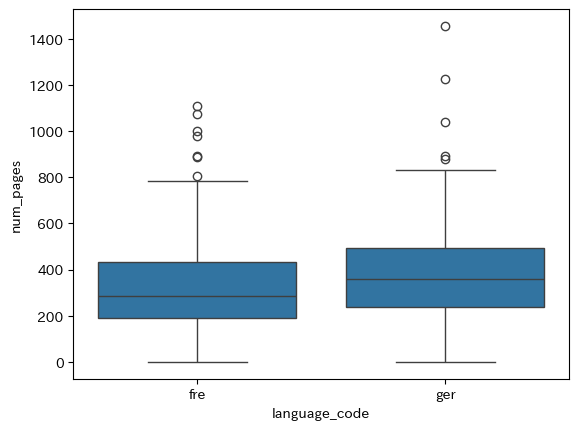

In [ ]:
data = df[ (df['language_code'] == 'ger') | (df['language_code'] == 'fre') ]
# Boxプロット
sns.boxplot(data, y='num_pages', x ='language_code')

In [ ]:
data.groupby('language_code')['num_pages'].mean()

,num_pages
language_code,
fre,339.000000
ger,391.979798


In [ ]:
392-339

53

t検定を使い、fre と ger でページ数の平均値に統計的に優位な差があるか確認する。

In [ ]:
df.shape

(11123, 12)

In [ ]:
# パッケージのインポート
from scipy import stats

# ページ数の平均を比較
data_fre = df[df['language_code'] == 'fre']['num_pages']
data_ger = df[df['language_code'] == 'ger']['num_pages']

# t検定を実行
t_stat, p_value = stats.ttest_ind(data_fre, data_ger, equal_var=False)

print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_value:.5f}")


t-statistic: -1.74
p-value: 0.08359


In [ ]:
# ページ数の分布の分散が等しいか検定する
# パッケージのインポート
from scipy import stats

# 等分散性の検定
levene_stat, levene_p_value = stats.levene(data_fre, data_ger)
print(f"Levene's test statistic: {levene_stat:.2f}")
print(f"p-value: {levene_p_value:.5f}")

Levene's test statistic: 0.29
p-value: 0.59036


この結果より、p値が大きく
帰無仮説（分散が等しい）を積極的に否定するデータが得られていない、
（分散が同じと仮定して大きな問題はない）
と結論することになる。



---
---

---
---


# Wineデータを使う

次に、Wineデータの読み込みを行う。

Wineデータは、sklearn に組み込まれているサンプルデータである。
データの読み込みは、以下のように行う。

In [ ]:
from sklearn.datasets import load_wine
# データの読み込み
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)

データの確認を行う。主な確認ポイントは以下の通りである。


*   レコード数
*   項目数
*   各項目の型
*   欠損値の有無
*   異常値の有無


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

## 利用するデータ概要

Wineデータセットは、イタリアの同じ地域で栽培された3種類のワインに
含まれる成分を測定したデータ。
13の項目がある。

| 項目                          | 説明                                       |
|---------------------------------|--------------------------------------------|
| Alcohol（アルコール）           | ワインに含まれるアルコールの量。           |
| Malic Acid（リンゴ酸）          | ワインに含まれるリンゴ酸の量。             |
| Ash（灰分）                     | ワインの灰分の量。                         |
| Alcalinity of Ash（灰分のアルカリ度） | 灰分のアルカリ度。                   |
| Magnesium（マグネシウム）       | ワインに含まれるマグネシウムの量。         |
| Total Phenols（総フェノール）   | ワインに含まれるフェノール類の総量。       |
| Flavanoids（フラバノイド）      | ワインに含まれるフラバノイドの量。         |
| Nonflavanoid Phenols（非フラバノイドフェノール） | ワインに含まれる非フラバノイドフェノールの量。 |
| Proanthocyanins（プロアントシアニン） | ワインに含まれるプロアントシアニンの量。 |
| Color Intensity（色の強度）     | ワインの色の強度。                         |
| Hue（色相）                     | ワインの色相。                             |
| OD280/OD315 of Diluted Wines（希釈ワインのOD280/OD315） | 希釈されたワインのOD280/OD315の比率。 |
| Proline（プロリン）             | ワインに含まれるプロリンの量。             |

### 基本統計量を得る

数値型の項目の場合、最小値や最大値、平均や標準偏差といった数値を**基本統計量**
と呼び、分析の前には必ず確認する必要がある。

In [ ]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
# アルコールの四分位範囲を計算
iqr_alcohol = df[['alcohol']].quantile(0.75) - df[['alcohol']].quantile(0.25)

print(f"アルコールの四分位範囲 (IQR): {iqr_alcohol}")

アルコールの四分位範囲 (IQR): alcohol    1.315
dtype: float64


### 数値型項目に関する確認事項

*   分布の形状（山が一つか？）、左右の偏りの確認。
*   分布の端が極端に離れていないか。外れ値がある可能性。
*   変数間の相関

<Axes: xlabel='magnesium', ylabel='Count'>

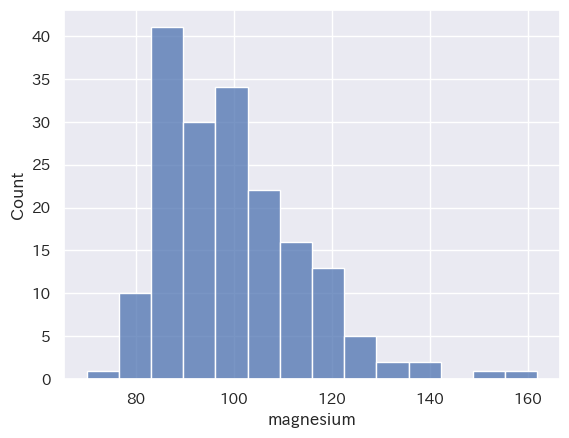

In [ ]:
sns.histplot(data=df, x='magnesium')

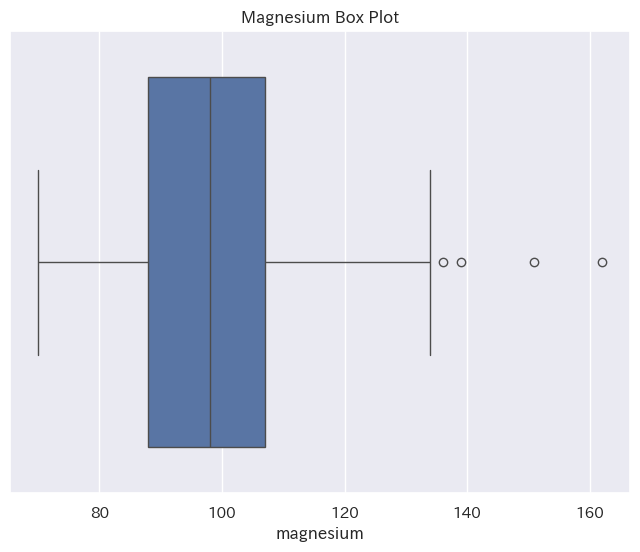

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['magnesium'])
plt.title('Magnesium Box Plot')
plt.show()

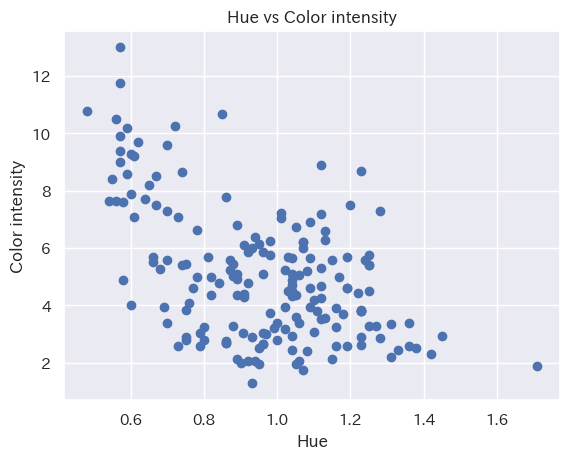

In [ ]:
# hue と color_intensity の散布図を書く

import matplotlib.pyplot as plt
plt.scatter(df['hue'], df['color_intensity'])
plt.xlabel('Hue')
plt.ylabel('Color intensity')
plt.title('Hue vs Color intensity')
plt.show()


In [ ]:
# alcohol と color_intensity の相関係数を求める
df[['alcohol','color_intensity']].corr()

,alcohol,color_intensity
alcohol,1.000000,0.546364
color_intensity,0.546364,1.000000


In [ ]:
df[df['hue'] >= 1.0].shape

(84, 13)

In [ ]:
df[df['hue'] >= 1.0]['color_intensity'].median()

4.225

In [ ]:
df[(df['hue'] >= 0.4 ) & (df['hue'] <= 0.5)]['color_intensity'].mean()

np.float64(10.8)

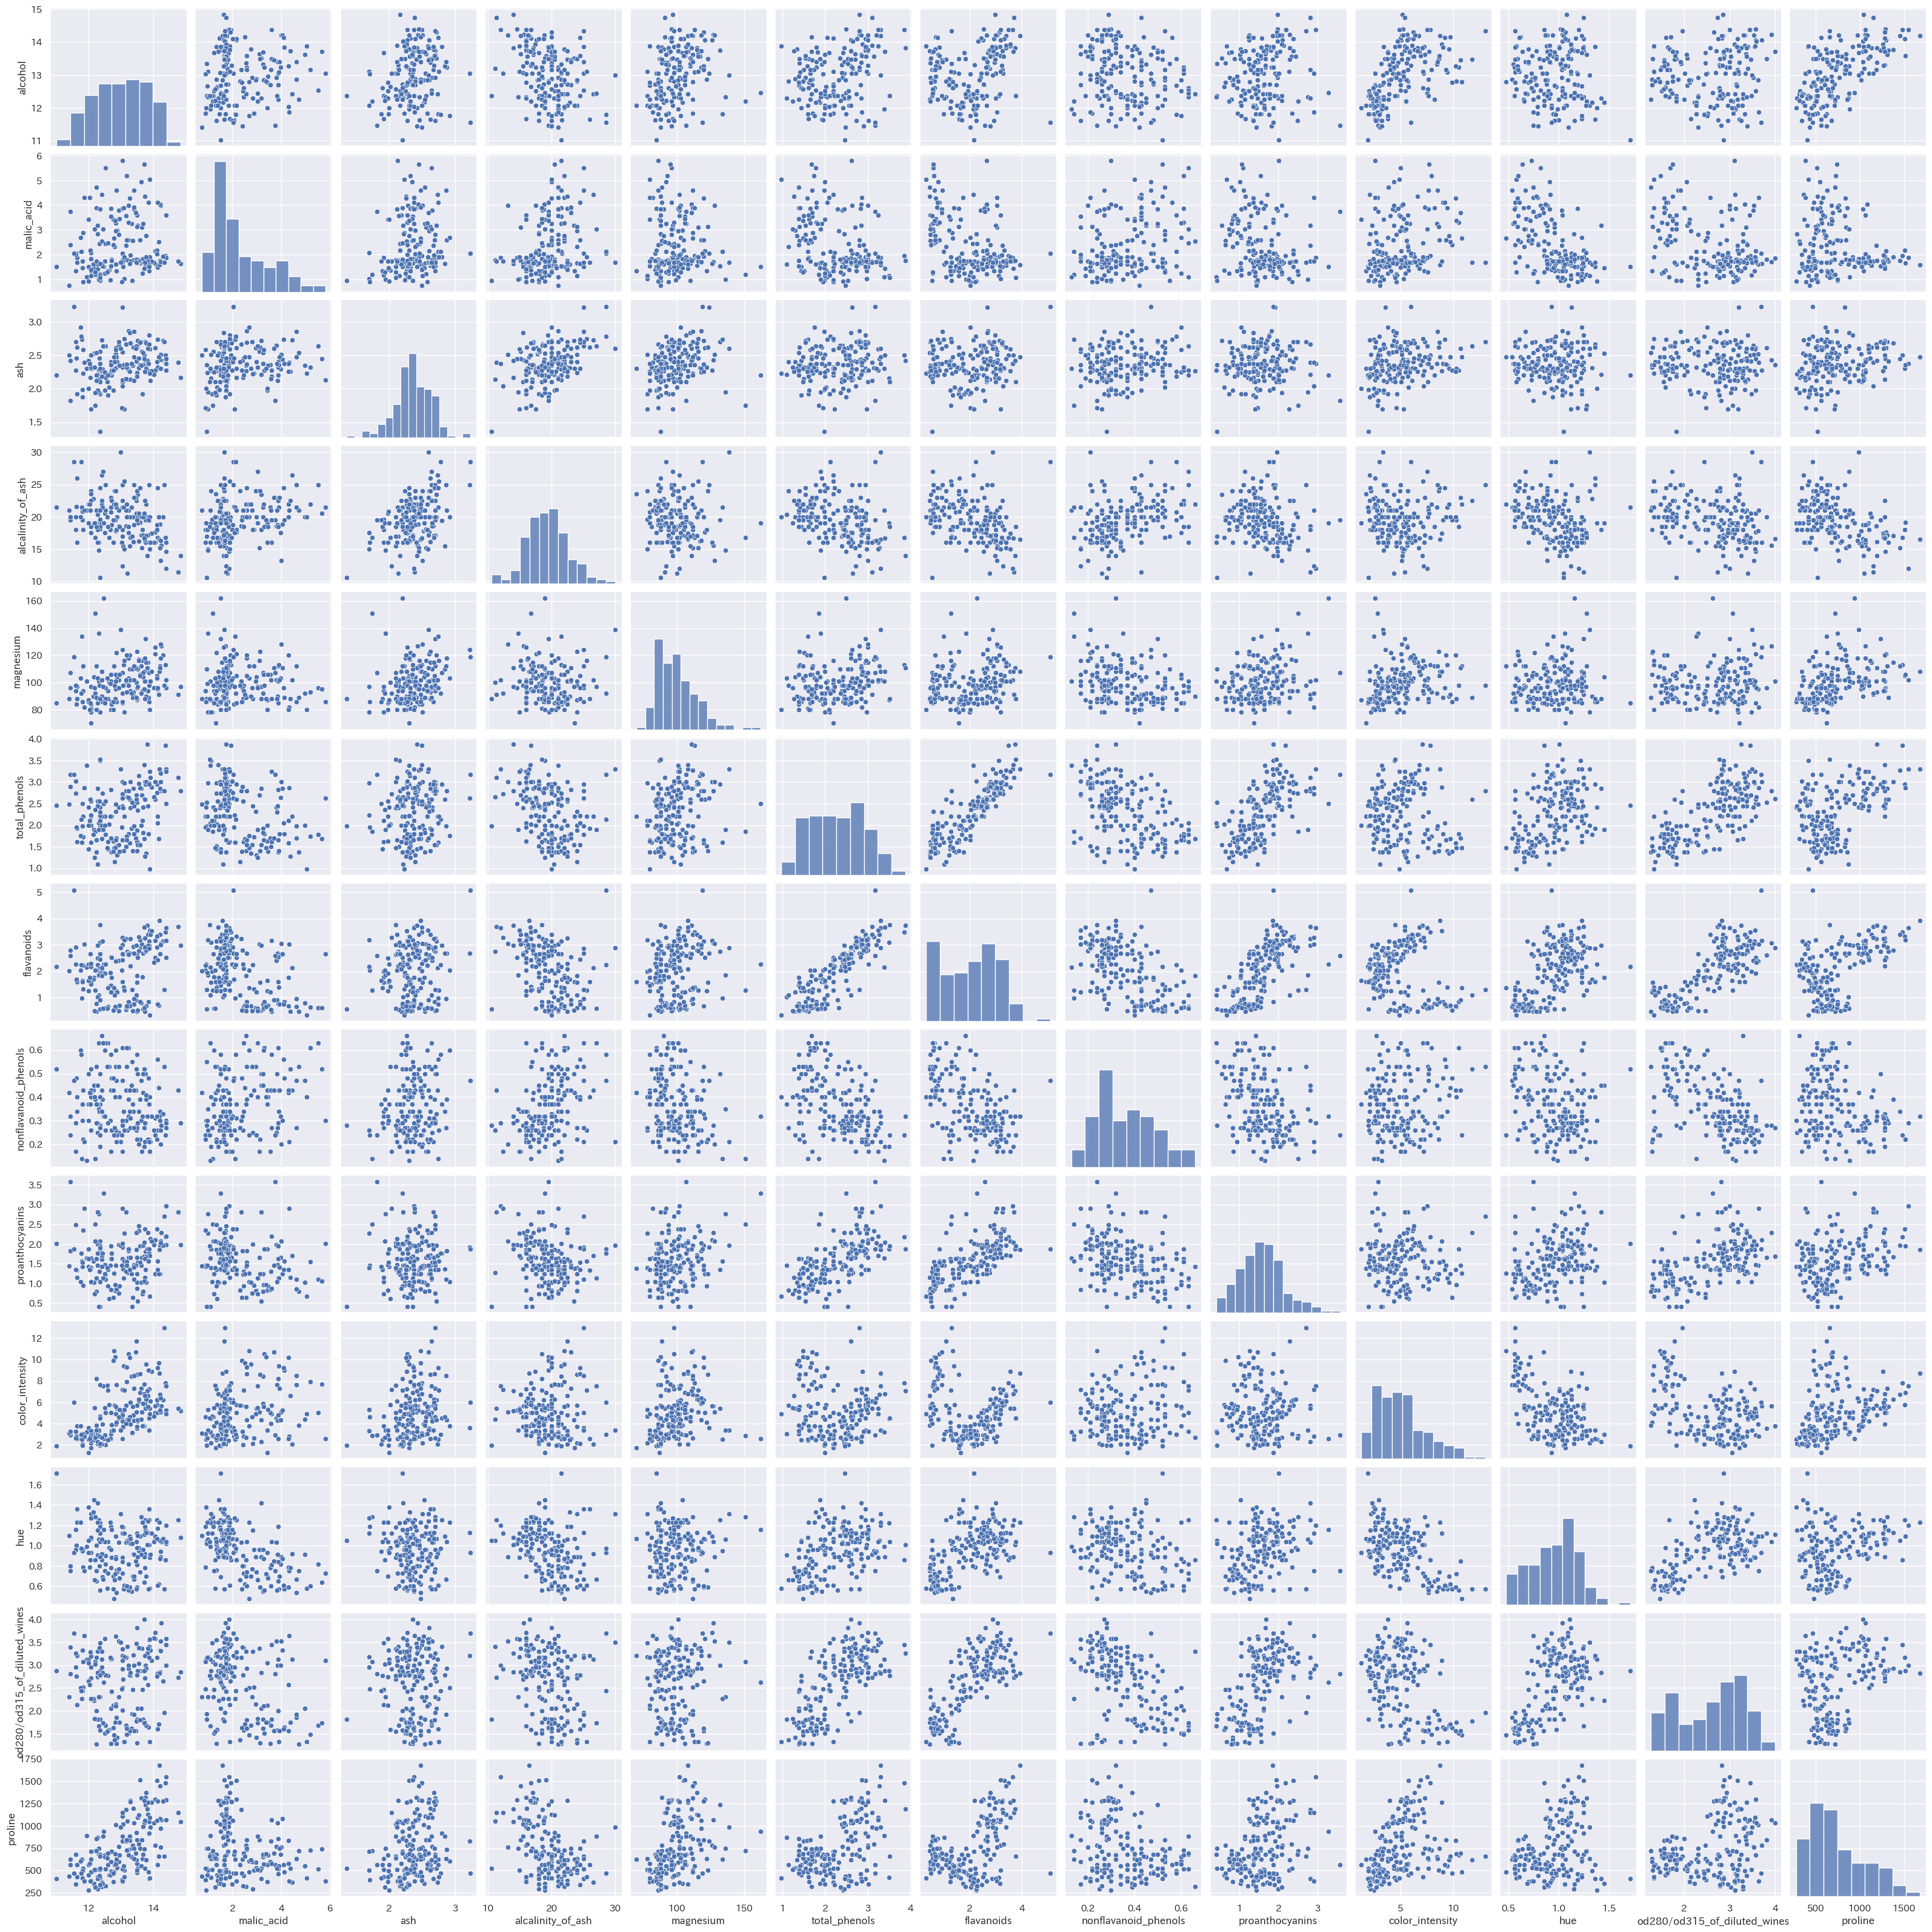

In [ ]:
sns.pairplot( data = df)

<Axes: xlabel='color_intensity'>

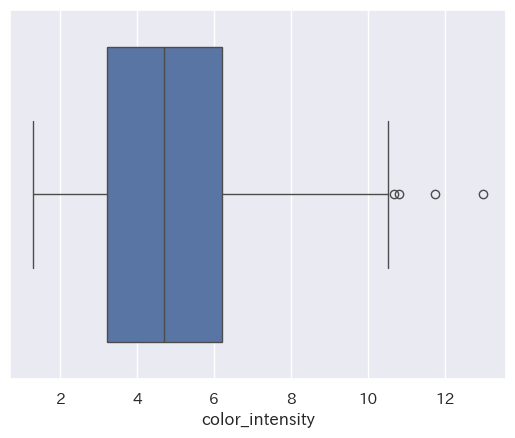

In [ ]:
sns.boxplot(x=df['color_intensity'])

### 外れ値の確認

外れ値とは、極端に大きな値や小さな値のことである。箱ひげ図を描くことで視覚的に確認ができる。

項目 alcohol に外れ値があるか、箱ひげ図を描いて確認する。

<Axes: ylabel='alcohol'>

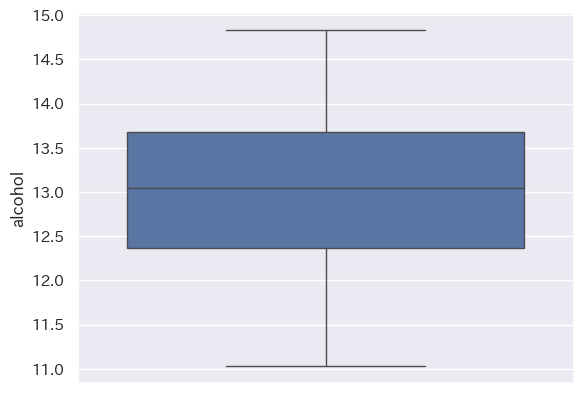

In [ ]:
sns.boxplot(df['alcohol'])

項目 malic_acid に外れ値があるか、箱ひげ図を描いて確認する。

<Axes: ylabel='malic_acid'>

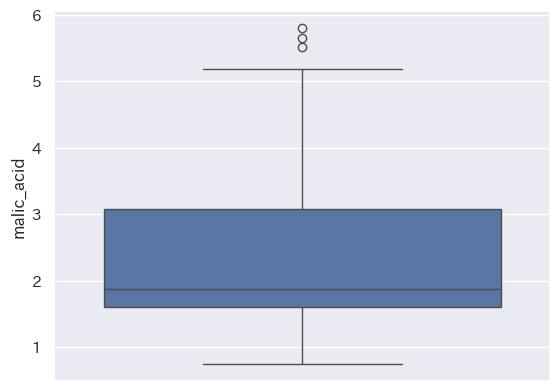

In [ ]:
sns.boxplot(df['malic_acid'])

箱ひげ図で外れ値となる値は、

> 箱の上＋1.5×箱の長さ

より大きいか

> 箱の下ー1.5×箱の長さ

より小さいかである。

また、箱の上は第三四分位、箱の下は第一四分位に相当する。

項目 malic_acid の外れ値となる閾値をもとめる。

In [ ]:
q3 = df['malic_acid'].quantile(0.75)
q1 = df['malic_acid'].quantile(0.25)

q3 + 1.5 * ( q3 - q1 )

np.float64(5.3025)

In [ ]:
df[df['malic_acid']>5.30]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
123,13.05,5.80,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.6,0.73,3.10,380.0
137,12.53,5.51,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.0,0.82,1.69,515.0
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0


In [ ]:
df.sort_values(by = 'malic_acid', ascending=False)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
123,13.05,5.80,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380.0
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
137,12.53,5.51,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515.0
155,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0
146,13.88,5.04,2.23,20.0,80.0,0.98,0.34,0.40,0.68,4.90,0.58,1.33,415.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,13.34,0.94,2.36,17.0,110.0,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750.0
80,12.00,0.92,2.00,19.0,86.0,2.42,2.26,0.30,1.43,2.50,1.38,3.12,278.0
76,13.03,0.90,1.71,16.0,86.0,1.95,2.03,0.24,1.46,4.60,1.19,2.48,392.0
84,11.84,0.89,2.58,18.0,94.0,2.20,2.21,0.22,2.35,3.05,0.79,3.08,520.0


なお、以降は外れ値の除外などは行わずに実行する。

In [ ]:
# データの読み込み
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# 標準化に必要なライブラリーのインポート
from sklearn.preprocessing import StandardScaler
# 前処理（データの正規化）
X = df

scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=df.columns)

<Axes: xlabel='Num of clusters', ylabel='Inertia'>

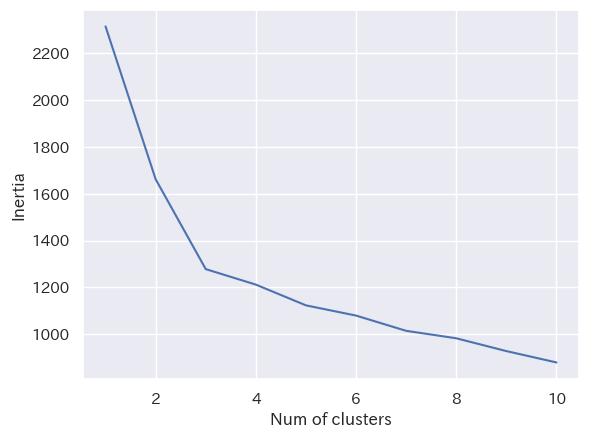

In [ ]:
# クラスタリングに必要なライブラリーのインポート
from sklearn.cluster import KMeans

# Elbow Methodによるハイパーパラメータチューニング
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter = 300, n_init='auto', random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# グリッド線を表示するスタイルに変更する
sns.set_style('whitegrid')
# sns.set_theme('paper')
sns.set(font='IPAexGothic')

# エルボー図のプロット
elbow = pd.DataFrame( inertia, columns = ['Inertia'])
elbow['Num of clusters'] = range(1,11)
sns.lineplot(data = elbow, x='Num of clusters', y= 'Inertia')

In [ ]:
inertia

[2313.999999999999,
 1661.6761165626497,
 1277.928488844643,
 1211.7531134671588,
 1123.1565470796968,
 1079.5385091588264,
 1014.4309086924652,
 982.6549762937694,
 927.9560760726209,
 879.4257007542493]

In [ ]:
inertia[2] - inertia[1]

-383.7476277180067

In [ ]:
inertia[3] - inertia[2]

-66.17537537748422

In [ ]:
# 最適なクラスタ数でKMeansクラスタリング（この例では、エルボーが3であると仮定）
best_n_clusters = 3  # エルボー図から選択
kmeans = KMeans(n_clusters=best_n_clusters, init='k-means++', max_iter = 300, n_init='auto', random_state=42)
kmeans.fit(X)

# クラスタラベルをデータフレームに追加
df['cluster'] = kmeans.labels_

# 各クラスタの特徴を調査（平均値、標準偏差など）
df.groupby('cluster').agg(['mean']).reset_index()

,cluster,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231
1,1,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
2,2,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806


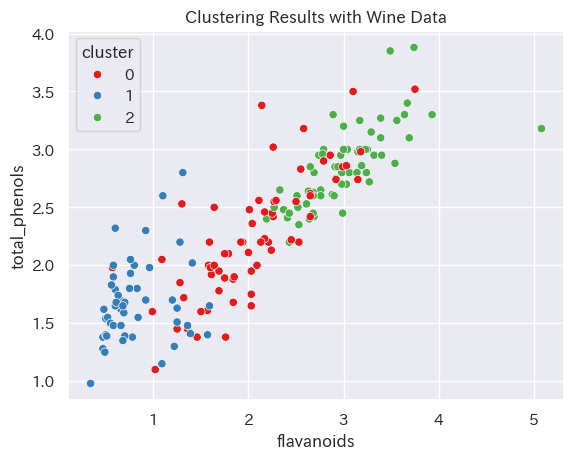

In [ ]:
# 結果の可視化（seabornを使用）
sns.scatterplot(x='flavanoids', y='total_phenols', hue='cluster', data=df, palette='Set1')
plt.title('Clustering Results with Wine Data')
plt.show()

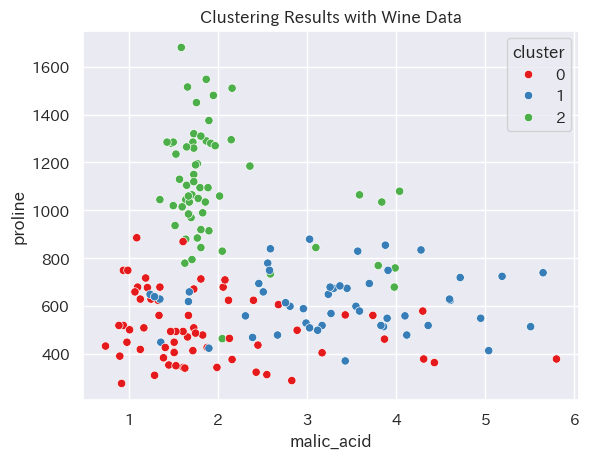

In [ ]:
# 結果の可視化（seabornを使用）
sns.scatterplot(x='malic_acid', y='proline', hue='cluster', data=df, palette='Set1')
plt.title('Clustering Results with Wine Data')
plt.show()

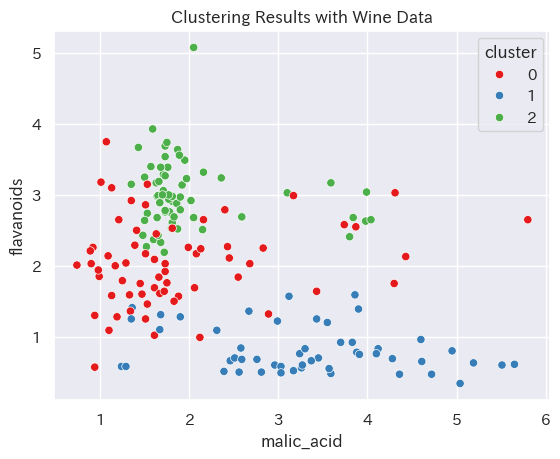

In [ ]:
# 結果の可視化（seabornを使用）
sns.scatterplot(x='malic_acid', y='flavanoids', hue='cluster', data=df, palette='Set1')
plt.title('Clustering Results with Wine Data')
plt.show()